In [2]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
import torch
from wc_sac import *
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

In [5]:
setpoints = [2.6291,2.6292, 2.6293]
seeds = [0, 42, 85]
agent_types = ['wcsac', 'safesac', 'augsac']

for i, seed in enumerate(seeds) :
  setpoint = setpoints[i]
  core_env = PendulumGymWrapper(gym.make('Pendulum-v1'))
  # agent, env = train_default_sac(core_env = core_env, 
  #                                desired_state= setpoint, 
  #                                seed = seed, 
  #                                n_episodes = 200, 
  #                                observation_type='setpoint-error', 
  #                                randomise_setpoint=True)

  agent, env = train_default_sac(core_env = core_env, 
                                    desired_state= setpoint, 
                                    seed = seed, 
                                    observation_type='state', 
                                    randomise_setpoint=False, 
                                    rescale_observation=False, 
                                    total_timesteps = 70000)
  for agent_type in agent_types: 
    for avg_q in [True, False]:
      if avg_q == False and agent_type == 'augsac':
        continue
      
      safe_agent, env, delay_history, setpoint_history = train_default_augmented_sac(core_env = core_env, 
                                              agent_type= agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type='state',
                                              randomise_setpoint=False, 
                                              random_delay=True,
                                              average_q=avg_q,
                                              total_timesteps = 70000,
                                              ent_coef=0.5,
                                              undelayed_critic=agent.critic)
      # min_str = 'min' if not avg_q else ''
      # np.save(f'histories/delay/RobotSteer/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', delay_history)
      # np.save(f'histories/setpoint/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', setpoint_history)
 





Observing state without wrappers
Rescaling action
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/PendulumEnv/state/fixed/0629/Desired2.6291/sac
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.47e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 21        |
|    time_elapsed    | 36        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 24.2      |
|    critic_loss     | 0.254     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.49e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps         

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\PendulumEnv\state\fixed\Desired2.6291' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state_space_violation to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state_space_violation` for environment variables or `env.get_wrapper_attr('state_space_violation')` that will search the reminding wrappers.
  logger.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.14e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 16        |
|    time_elapsed    | 49        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 19.2      |
|    critic_loss     | 0.396     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.31e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 15        |
|    time_elapsed    | 104       |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 43.8      |
|    critic_loss     | 0.595     |
|    ent_coef       

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.delay_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.delay_history` for environment variables or `env.get_wrapper_attr('delay_history')` that will search the reminding wrappers.
  logger.warn(
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.desired_states_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desired_states_history` for environment variables or `env.get_wrapper_attr('desired_states_history')` that will search the reminding wrappers.
  logger.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.35e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 15        |
|    time_elapsed    | 50        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 24.6      |
|    critic_loss     | 0.579     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.34e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 14        |
|    time_elapsed    | 111       |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 50.5      |
|    critic_loss     | 0.821     |
|    ent_coef       

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\PendulumEnv\state\fixed\Desired2.6292' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.15e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 11        |
|    time_elapsed    | 72        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 20.2      |
|    critic_loss     | 0.387     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.26e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 10        |
|    time_elapsed    | 155       |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 41        |
|    critic_loss     | 0.43      |
|    ent_coef       

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\PendulumEnv\state\fixed\Desired2.6293' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.41e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 11        |
|    time_elapsed    | 68        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 24.1      |
|    critic_loss     | 0.801     |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.29e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 10        |
|    time_elapsed    | 149       |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 44        |
|    critic_loss     | 0.444     |
|    ent_coef       

Text(0.5, 1.0, 'Pendulum')

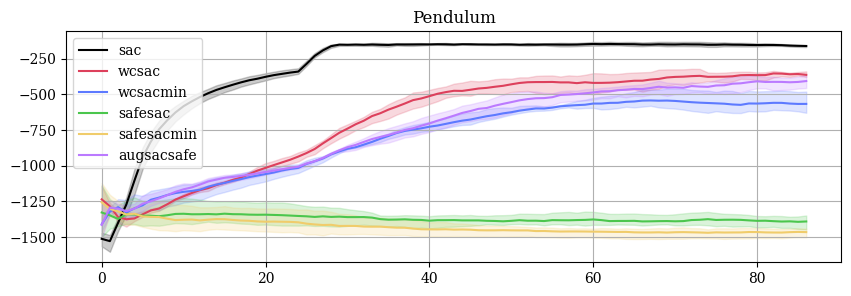

In [13]:
dates = ['0629','0629','0630']

setpoints = [2.6291,2.6292, 2.6293]

agent_types = ['sac','wcsac', 'wcsacmin', 'safesac', 'safesacmin','augsacsafe']

train_dict = {}
for agent_type in agent_types : 
    agent_dict = {}
    for i, setpoint in enumerate(setpoints):
        df = pd.read_csv(f'logs\\train\\PendulumEnv\\state\\fixed\\{dates[i]}\\Desired{setpoint}\\{agent_type}\\progress.csv')
        agent_dict[setpoint] = df
    train_dict[agent_type] = agent_dict


agent_dict = {}
for agent_type in agent_types:
    run_arr = []
    for i in range(len(setpoints)) : 
        df = pd.read_csv(f'logs\\train\\PendulumEnv\\state\\fixed\\{dates[i]}\\Desired{setpoints[i]}\\{agent_type}\\progress.csv')
        run_arr.append(np.array(df['rollout/ep_rew_mean']))
    run_arr = [run_arr[k][:50 if len(run_arr[k]) - 50  < 20 else len(run_arr[k])] for k in range(len(run_arr))]
    agent_dict[agent_type] = run_arr


colors = ['black','cold_red', 'warm_blue', 'warm_green', 'warm_yellow', 'warm_purple']
f, ax = plt.subplots(1,1, figsize = (10,3))

for i, agent_type in enumerate(agent_types) : 
    res = np.array(agent_dict[agent_type])
        
    r_min = np.min(res, axis = 0)
    r_max = np.max(res, axis = 0)
    r_avg= np.mean(res, axis = 0)

    ax.plot(range(len(r_avg)), r_avg, color = global_config.COLORS[colors[i]])
    ax.fill_between(range(len(r_avg)), r_min, r_max, color = global_config.COLORS[colors[i]],  alpha = .2, label='_nolegend_')
# ax.legend([agent_types[i//2] if i%2 == 0 else '' for i in range(2*len(agent_types))]
ax.legend(agent_types)
ax.grid()
ax.set_title ('Pendulum')
        